In [15]:
import numpy as np
import os
import matplotlib.pyplot as plt
import json

In [16]:
#sub_dir = '/volatile/jl277509/Runs/02_STS_babies/Program/Output/2024-02-26/'
sub_dir = '/volatile/jl277509/Runs/02_STS_babies/Program/Output/1-5mm_STS_babies/'

In [20]:
#models = ['17-16-30_112', '18-37-28_0', '18-37-28_1', '18-37-28_2', '18-37-28_3', '18-37-28_4']
#models = ['14-35-49_163', '21-38-51_0', '21-38-51_1', '21-38-51_2', '21-38-51_3']
#models = ['11-45-15_0', '11-45-15_1', '11-45-15_2', '11-45-15_3', '11-45-15_4']
#models = ['19-57-02_0', '19-57-02_1', '19-57-02_2']
#models = ['12-12-35_0']
#models = ['14-17-27_0', '14-17-27_1', '14-17-27_2', '14-17-27_3']
#models = ['16-44-39_0', '16-44-39_1', '16-44-39_2', '16-44-39_3']
#models = ['17-19-54_0', '17-19-54_1', '17-19-54_2', '17-19-54_3']
#models = ['random_all_keep_bottom_5', 'random_all_keep_bottom_6', 'random_all_keep_bottom_7', 'random_all_keep_bottom_8', 'random_all_keep_bottom_9', 'random_all_keep_bottom_10']
#models = ['14-17-27_0', '14-17-27_1', '14-17-27_2', '14-17-27_3']
#models = [f'1-5mm_L4_{k}' for k in range(5)]
models = [f'16-36-43_{k}' for k in range(3)]
#models = [f'14-06-51_{k}' for k in range(3)]
epochs = [k for k in range(0, 250, 10)]
#models = ['random_all_keep_bottom_5']
#epochs = [k for k in range(0, 250)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


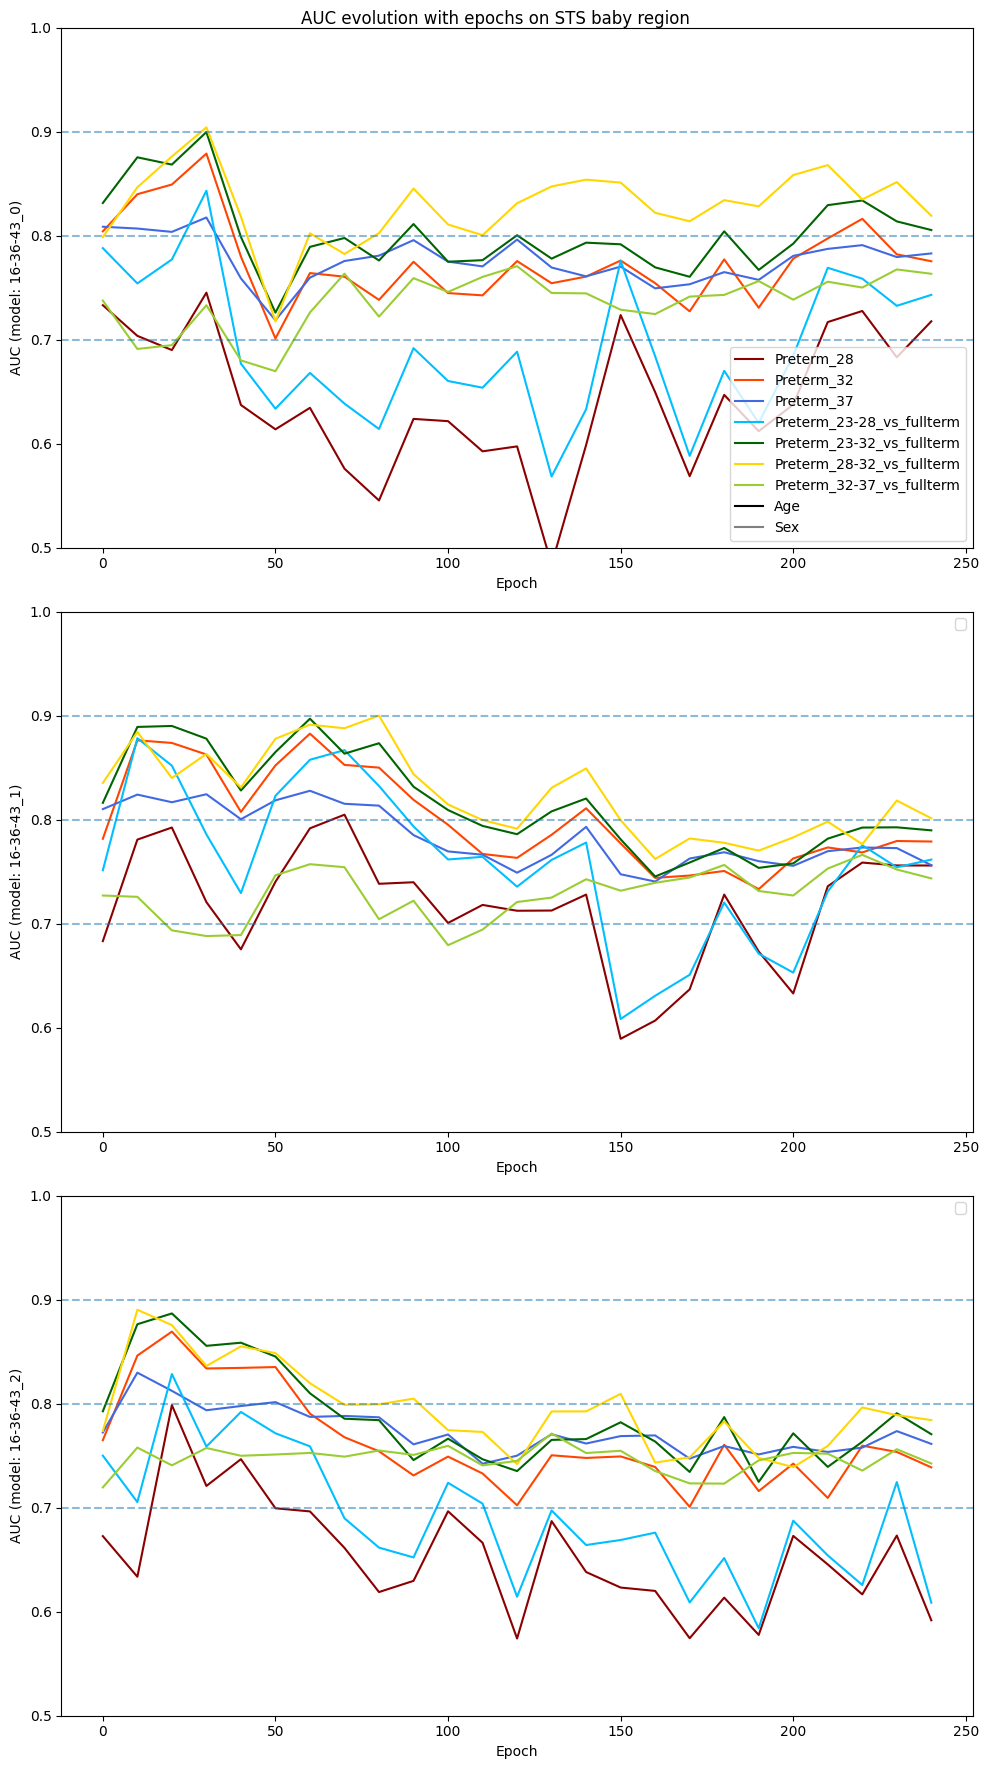

In [21]:
#target = 'train_val_values.json'
embeddings = ['dHCP', 'dHCP', 'dHCP', 'dHCP', 'dHCP', 'dHCP', 'dHCP','UKB_5percent', 'UKB_5percent']
labels = ['Preterm_28', 'Preterm_32', 'Preterm_37', 'Preterm_23-28_vs_fullterm', 'Preterm_23-32_vs_fullterm',
          'Preterm_28-32_vs_fullterm', 'Preterm_32-37_vs_fullterm','Age', 'Sex']
#sets = ['full', 'full', 'full', 'train_val', 'train_val', 'train_val', 'train_val', 'train_val', 'train_val']
sets = ['full', 'full', 'full', 'full', 'full', 'full', 'full', 'train_val', 'train_val']
colors = ['darkred', 'orangered', 'royalblue', 'deepskyblue', 'darkgreen', 'gold', 'yellowgreen', 'black', 'gray']
#metric = 'train_val_auc'
fig, axs = plt.subplots(figsize=(10,6*len(models)), nrows=len(models))

for embedding, label, s, c in zip(embeddings, labels, sets, colors):
    metric, target = f'{s}_auc', f'{s}_values.json'
    selected_models_dirs = [root for root, dirs, files in os.walk(sub_dir, followlinks=True)
                                    if (target in files) & (root.endswith(label)) & (embedding in root) & ('best_model' not in root)]
    dict_perf = {model : [] for model in models}
    dict_perf['epoch'] = []
    for model in models:
        for epoch in epochs:
            for directory in selected_models_dirs:
                if ('epoch'+str(epoch)+'_' in directory) and (model in directory):
                    with open(os.path.join(directory,target), 'r') as f:
                        perf = json.load(f)
                    if isinstance(perf[metric], float):
                        value = perf[metric]
                    else:
                        value = perf[metric][0]
                    dict_perf['epoch'].append(epoch)
                    dict_perf[model].append(value)
    for i, model in enumerate(models):
        if model in dict_perf.keys():
            x, y = epochs, dict_perf[model]
            if i==0:
                axs[i].plot(x[:len(y)], y, label=label, c=c)
            else:
                axs[i].plot(x[:len(y)], y, c=c)
for i, model in enumerate(models):
    ax=axs[i]
    ax.axline((0, 0.90), (1, 0.90), linestyle='--', alpha=0.5)
    ax.axline((0, 0.80), (1, 0.80), linestyle='--', alpha=0.5)
    ax.axline((0, 0.70), (1, 0.70), linestyle='--', alpha=0.5)
    ax.set_xlabel('Epoch')
    ax.set_ylabel(f'AUC (model: {model})')
    ax.legend()
    ax.set_ylim([0.5, 1])
plt.suptitle(f'AUC evolution with epochs on STS baby region')
plt.tight_layout()
plt.show()